# Primer to Shapely

## Imports

In [1]:
from shapely import Point, points, LineString, LinearRing, Polygon
from shapely.wkt import loads, dumps

## Create a point

In [2]:
pt = Point(2, 3)

In [3]:
type(pt)

shapely.geometry.point.Point

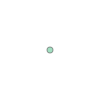

In [4]:
pt

## Get point's coordinates

In [5]:
pt.x

2.0

In [6]:
pt.y

3.0

In [7]:
pt.xy

(array('d', [2.0]), array('d', [3.0]))

In [8]:
len(pt.xy)

2

In [9]:
pt.xy[0]

array('d', [2.0])

In [10]:
pt.xy[1]

array('d', [3.0])

In [11]:
pt.coords

In [12]:
pt.coords.__dict__

{'_coords': array([[2., 3.]])}

In [13]:
list(pt.coords)

[(2.0, 3.0)]

In [14]:
# Use slicing
pt.coords[:]

[(2.0, 3.0)]

## Create multiple points

### Individually - a bit impractical

In [15]:
pt1 = Point(2, 3)
pt2 = Point(-1, -2)
pt3 = Point(-3, 4)
pt3 = Point(0, 0)

### From list of coordinates

In [16]:
pts = points(
    [
        [2, 3], [-1, -2], [-3, 4], [0, 0]
    ]
)

In [17]:
pts

array([<POINT (2 3)>, <POINT (-1 -2)>, <POINT (-3 4)>, <POINT (0 0)>],
      dtype=object)

### From list of Xs and Ys

In [18]:
Xs = [2, -1, -3, 0]
Ys = [3, -2, 4, 0]

In [19]:
pts = points(
    Xs, Ys
)

In [20]:
pts

array([<POINT (2 3)>, <POINT (-1 -2)>, <POINT (-3 4)>, <POINT (0 0)>],
      dtype=object)

In [21]:
Zs = [0, 0, 0, 0]

In [22]:
pts = points(
    Xs, Ys, Zs
)

In [23]:
pts

array([<POINT Z (2 3 0)>, <POINT Z (-1 -2 0)>, <POINT Z (-3 4 0)>,
       <POINT Z (0 0 0)>], dtype=object)

### From `wkt`

* There's also a function for loading binary well known points (wkb.loads)
* Converting shapely `Point` into `wkt` is done with `dump` function.

In [24]:
points = [
    "POINT (2 3)",
    "POINT (-1 -2)",
    "POINT (-3 4)",
    "POINT (0 0)"
]

In [25]:
loads(points)

array([<POINT (2 3)>, <POINT (-1 -2)>, <POINT (-3 4)>, <POINT (0 0)>],
      dtype=object)

In [26]:
dumps(Point(0, 0))

'POINT (0.0000000000000000 0.0000000000000000)'

In [27]:
dumps(
    [Point(0, 0), Point(1, 1)],
    trim=True
)

array(['POINT (0 0)', 'POINT (1 1)'], dtype=object)

## Create a Line (`LineString`)

We need a min of two points to create a line.

Good for creating e.g. road or river representation.

### From coordinates

In [28]:
ln = LineString(
    [
        (0, 0),
        (1, 0),
        (2, 1)
    ]
)

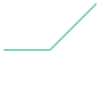

In [29]:
ln

### From `Points`

In [30]:
ln1 = LineString(
    [
        Point(0, 0),
        Point(1, -1),
        Point(-2, -1)
    ]
)

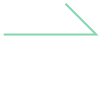

In [31]:
ln1

### Line can have complex shape and cross each other

In [32]:
ln2 = LineString(
    [
        Point(0, 0),
        Point(2, 2),
        Point(3, -1),
        Point(1, 2),
        Point(1, -1),
    ]
)

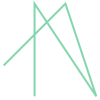

In [33]:
ln2

## Get line's coordinates

In [34]:
# Arrays of Xs and Ys
ln2.xy

(array('d', [0.0, 2.0, 3.0, 1.0, 1.0]),
 array('d', [0.0, 2.0, -1.0, 2.0, -1.0]))

In [35]:
# List of points
ln2.coords[:]

[(0.0, 0.0), (2.0, 2.0), (3.0, -1.0), (1.0, 2.0), (1.0, -1.0)]

## `LinearRing`

### `LinearRing` will create geometry from a random sequence of points but it's not always valid

In [36]:
lr = LinearRing(
    [
        Point(0, 0),
        Point(2, 2),
        Point(3, -1),
        Point(1, 2),
        Point(1, -1),
    ]
)

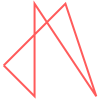

In [37]:
lr

In [38]:
lr.is_valid

False

### Valid ring

* no crossing line segments
* start end end have to be the same (though `shapely` implicitly closes the loop if the first and last point are different)

In [39]:
lr1 = LinearRing(
    [
        Point(0, 0),
        Point(2, 2),
        Point(3, -1),
        Point(-2, -2),
        Point(-3, 2),
    ]
)

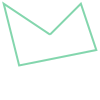

In [40]:
lr1

In [41]:
lr1.is_valid

True

In [42]:
lr1.xy

(array('d', [0.0, 2.0, 3.0, -2.0, -3.0, 0.0]),
 array('d', [0.0, 2.0, -1.0, -2.0, 2.0, 0.0]))

In [43]:
lr1.coords[:]

[(0.0, 0.0), (2.0, 2.0), (3.0, -1.0), (-2.0, -2.0), (-3.0, 2.0), (0.0, 0.0)]

## Polygons

### From coordinates or `Points`

In [44]:
pol = Polygon(
    [
        [0, 0], [2, 0], [0, 2]
    ]
)

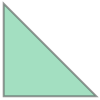

In [45]:
pol

In [46]:
pol = Polygon(
    [
        Point(0, 0), Point(-2, 0), Point(-2, -2)
    ]
)

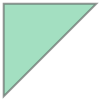

In [47]:
pol

### From `LineString`

In [48]:
lr_open = LineString(
    [
        [0, 1], [1, 0], [2, 0], [3, 1]
    ]
)

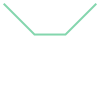

In [49]:
lr_open

In [50]:
pol_from_ls = Polygon(
    lr_open
)

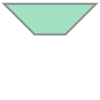

In [51]:
pol_from_ls

In [52]:
pol_from_ls.is_valid

True

Not all `LineStrings` create a valid `Polygon`.

It's got to be open ended.

In [53]:
lr_open_crossing = LineString(
    [
        [0, 1], [1, 0], [1, 1], [0, 0]
    ]
)

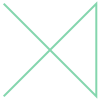

In [54]:
lr_open_crossing

In [55]:
pol_from_ls_cross = Polygon(
    lr_open_crossing
)

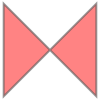

In [56]:
pol_from_ls_cross

In [57]:
pol_from_ls_cross.is_valid

False

### From `LinearRing`

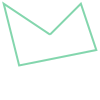

In [58]:
lr1

In [59]:
type(lr1)

shapely.geometry.polygon.LinearRing

In [60]:
pol = Polygon(
    lr1
)

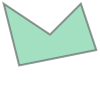

In [61]:
pol

In [62]:
type(pol)

shapely.geometry.polygon.Polygon

## Polygon with holes

Polygon takes two arguments, one required another optional.

* First argument: the outer shape.
* Second arguments: holes in the polygon

In [63]:
# one hole
pol = Polygon(
    shell=[
        [0, 0], [5, 0], [5, 3], [0, 3]
    ],
    holes=[
        [[1, 1], [2, 1], [2, 2]]
    ]
)

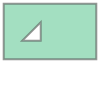

In [64]:
pol

In [65]:
# many hole
pol = Polygon(
    shell=[
        [0, 0], [5, 0], [5, 3], [0, 3]
    ],
    holes=[
        [[1, 1], [2, 1], [2, 2]],
        [[3, 1], [4, 1], [4, 2], [3, 2]]
    ]
)

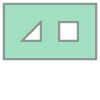

In [66]:
pol

## `Polygon` vs `LinearRing`

In [67]:
points = [
    [0,0], [4, 0], [4, 4], [0, 4]
]
hole = [
    [1, 1], [3, 1], [3, 3], [1, 3]
]

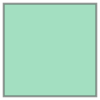

In [68]:
p1 = Polygon(points)
p1

In [69]:
p1.length

16.0

In [70]:
p1.area

16.0

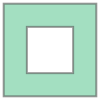

In [71]:
p2 = Polygon(points, [hole])
p2

In [72]:
p2.area

12.0

In [73]:
# Length includes outer boundary and inner lenght of the holes
p2.length

24.0

In [74]:
l = LinearRing(points)

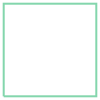

In [75]:
l

In [76]:
l.length

16.0

In [77]:
l.area

0.0